In [34]:
import pandas as pd
import numpy as np
from sklearn import tree, ensemble, \
preprocessing, model_selection, pipeline, metrics

import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.max_columns = 1000

from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [5]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

In [26]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
columns = X.columns
X = X.values.astype(np.float32)

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))


Accuracy: train: 0.751429, test: 0.733333


(<matplotlib.figure.Figure at 0x1a1aed52b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1afd62e8>)

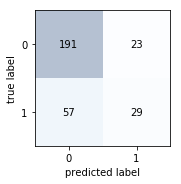

In [27]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Text(0,0.5,'TPR')

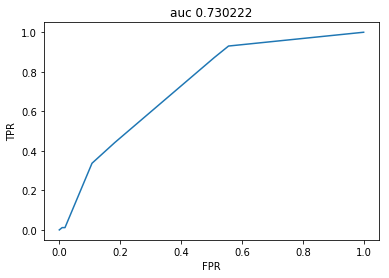

In [28]:
y_test_prob = pipe.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.title("ROC")
auc = metrics.auc(fpr, tpr)
plt.title("auc %f" % auc)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [29]:
est = pipe.steps[-1][-1]
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = columns, filled=True)
!dot -Tpng tree.dot -o tree.png

In [33]:
pd.DataFrame({"feature": columns, 
              "importance": est.feature_importances_}).sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.526610
0,months_loan_duration,0.181563
24,savings_balance_< 100 DM,0.085239
11,credit_history_fully repaid,0.084542
4,age,0.062193
39,installment_plan_none,0.059853
36,property_other,0.000000
28,employment_length_4 - 7 yrs,0.000000
29,employment_length_> 7 yrs,0.000000
30,employment_length_unemployed,0.000000


In [38]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
columns = X.columns
X = X.values.astype(np.float32)

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth=9))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))


Accuracy: train: 0.910000, test: 0.760000


Text(0,0.5,'TPR')

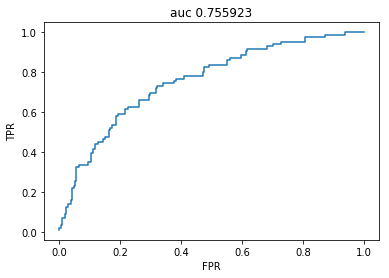

In [39]:
y_test_prob = pipe.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.title("ROC")
auc = metrics.auc(fpr, tpr)
plt.title("auc %f" % auc)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [41]:
pd.read_csv("/data/bank-full.csv", sep=";").head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
